EXO 1

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


EXO 2

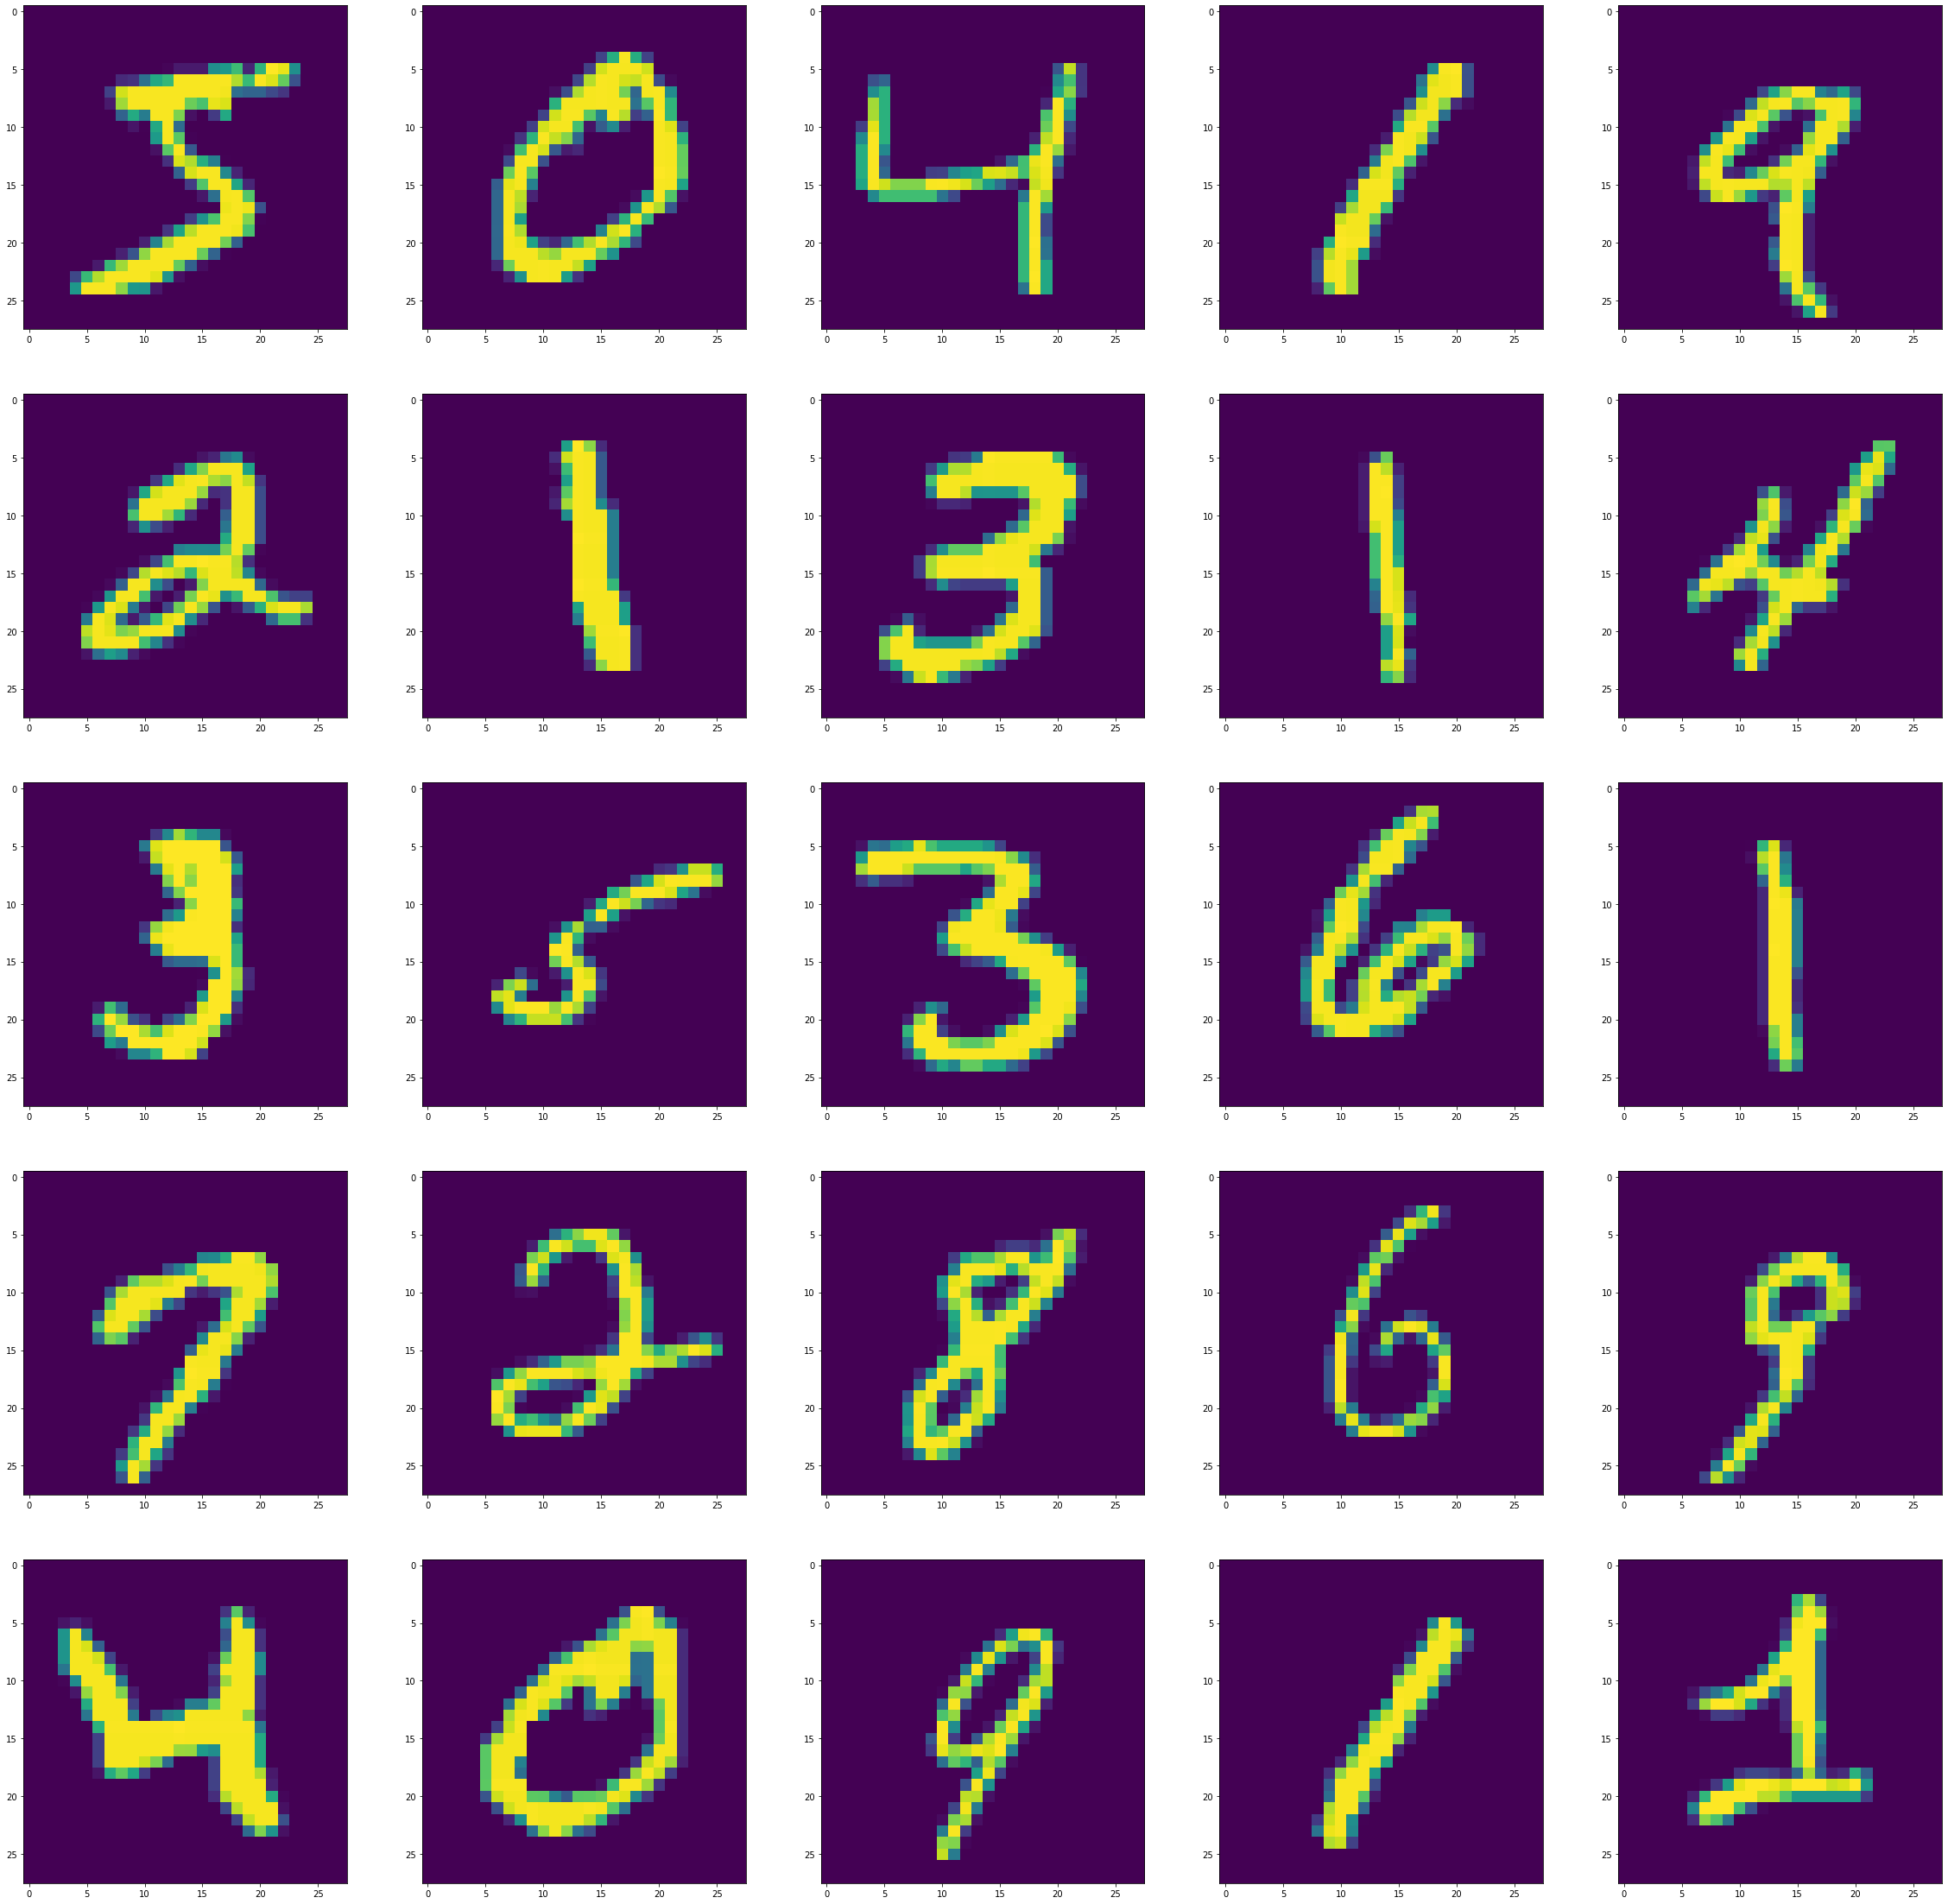

In [3]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(40, 40))
for i in range(25):
  fig.add_subplot(5, 5, i+1)
  plt.imshow(x_train[i])
plt.show()

EXO 3

In [4]:
LATENT_SIZE = 32
encoder = Sequential([
                      Flatten(input_shape = (28,28)),
                      Dense(512),
                      LR(),
                      Dropout(0.5),
                      Dense(256),
                      LR(),
                      Dropout(0.5),
                      Dense(128),
                      LR(),
                      Dropout(0.5),
                      Dense(64),
                      LR(),
                      Dropout(0.5),
                      Dense(LATENT_SIZE),
                      LR()
])
#The model does follow this pattern : Dense, ReLU, Dropout, Dense, ReLU, Dropout, Dense, ReLU, Dropout, Dense, ReLU, Dropout

EXO 4 & 5

In [5]:
#We create the encoder
decoder = Sequential([
                      Dense(64, input_shape = (LATENT_SIZE,)),
                      LR(),
                      Dropout(0.5),
                      Dense(128),
                      LR(),
                      Dropout(0.5),
                      Dense(256),
                      LR(),
                      Dropout(0.5),
                      Dense(512),
                      LR(),
                      Dropout(0.5),
                      Dense(784),
                      Activation("sigmoid"),
                      Reshape((28,28))
              ])

In [6]:
#And now the full model

img = Input(shape = (28,28))
latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

EXO 6

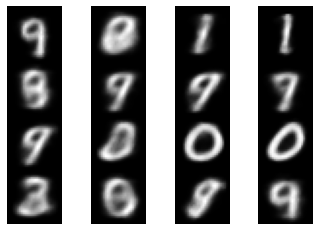

--------- EPOCH 0 ----------
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2065


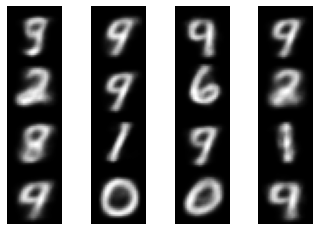

--------- EPOCH 1 ----------
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2017


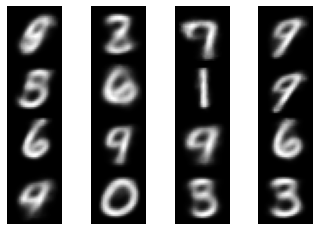

--------- EPOCH 2 ----------
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1994


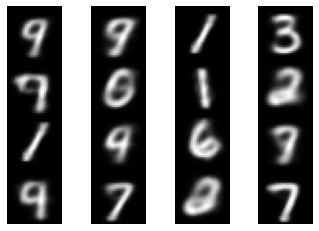

--------- EPOCH 3 ----------
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1977


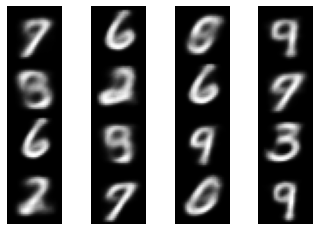

--------- EPOCH 4 ----------
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1969


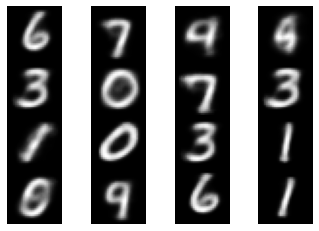

--------- EPOCH 5 ----------
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1962


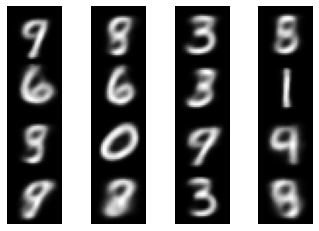

--------- EPOCH 6 ----------
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1957


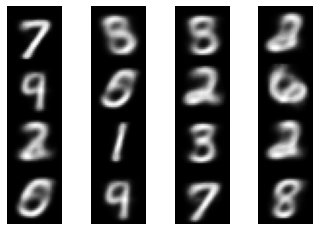

--------- EPOCH 7 ----------
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1954


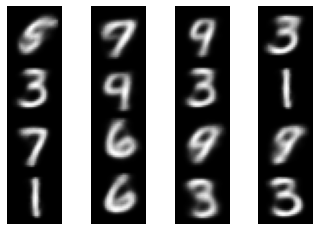

--------- EPOCH 8 ----------
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1950


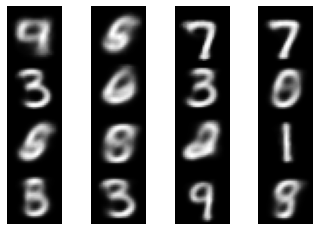

--------- EPOCH 9 ----------
 543/1875 [=======>......................] - ETA: 35s - loss: 0.1954

KeyboardInterrupt: ignored

In [8]:
EPOCHS = 60
for epoch in range(EPOCHS):
  fig, axs = plt.subplots(4,4)
  rand = x_test[np.random.randint(0,10000, 16)].reshape((4,4,1,28,28))

  

  for i in range(4):
    for j in range(4):
      axs[i, j].imshow(model.predict(rand[i,j])[0], cmap = "gray")
      axs[i, j].axis("off")

  plt.subplots_adjust(wspace = 0, hspace=0)
  plt.show()
  print("---------","EPOCH",epoch,"----------")
  model.fit(x_train, x_train)

EXO 7

In [9]:
# generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

EXO 8

In [10]:
# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

EXO 9

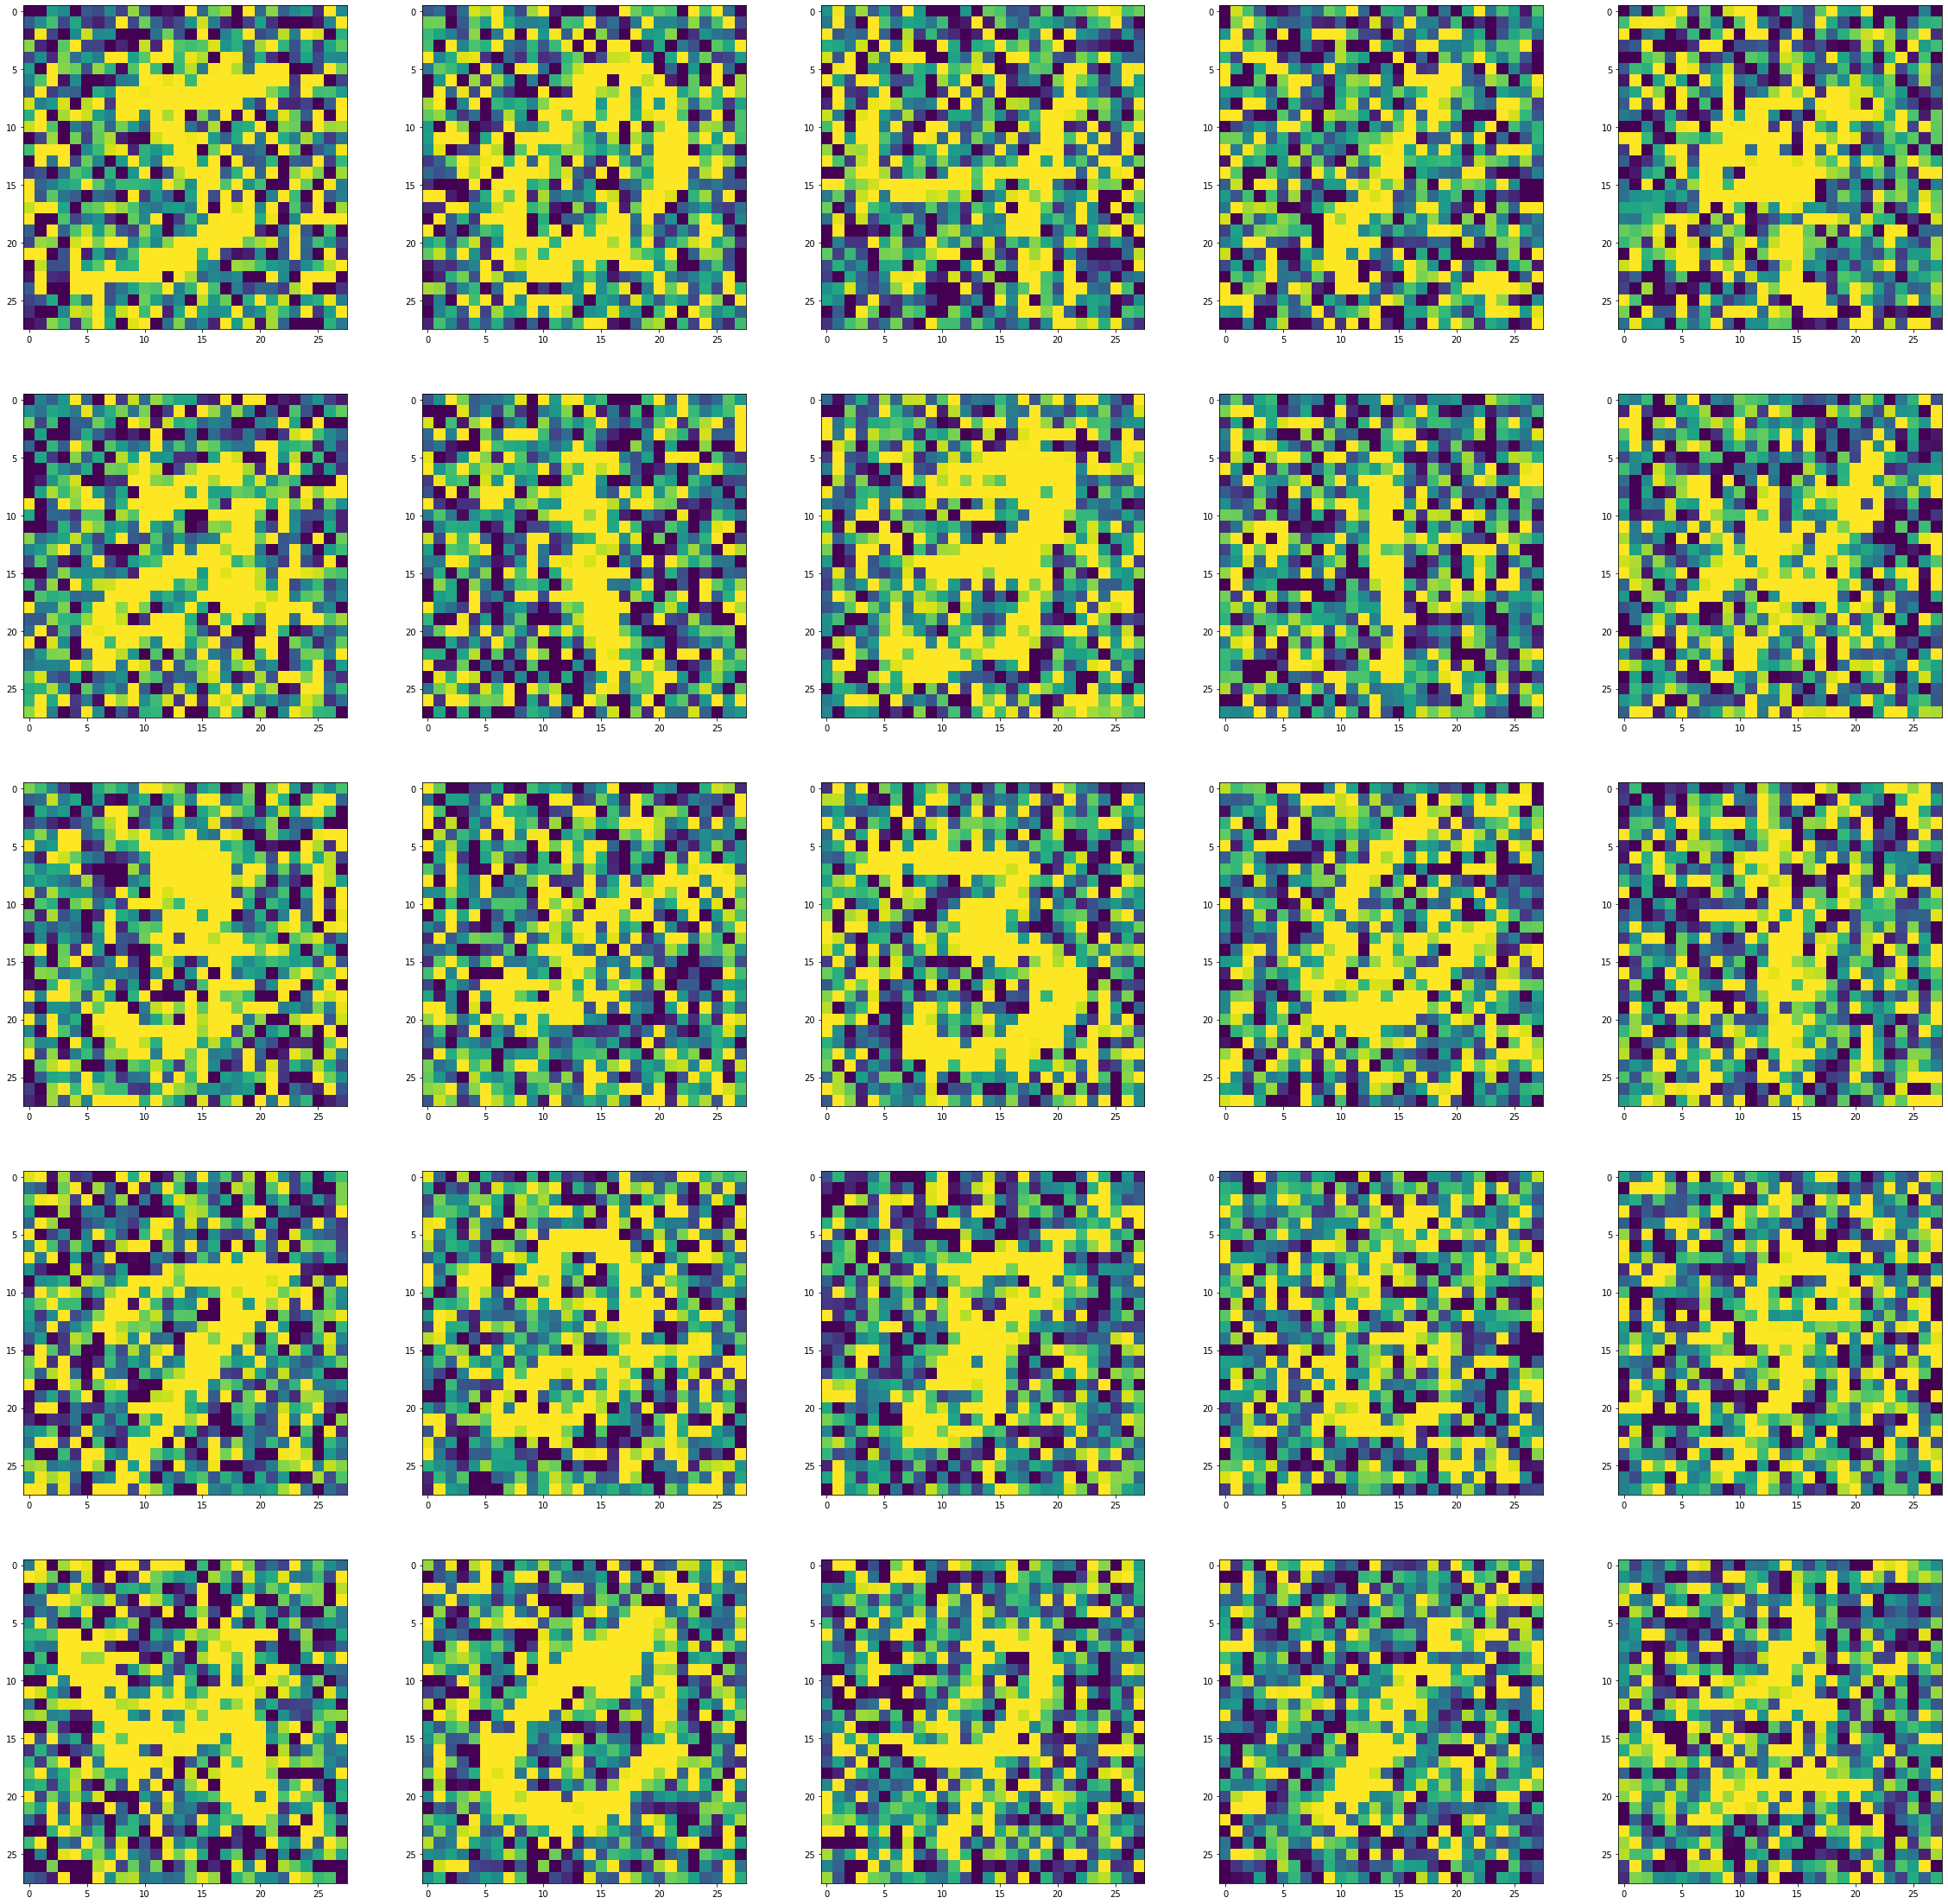

In [11]:
fig=plt.figure(figsize=(40, 40))
for i in range(25):
  fig.add_subplot(5, 5, i+1)
  plt.imshow(x_train_noisy[i])
plt.show()

EXO 10

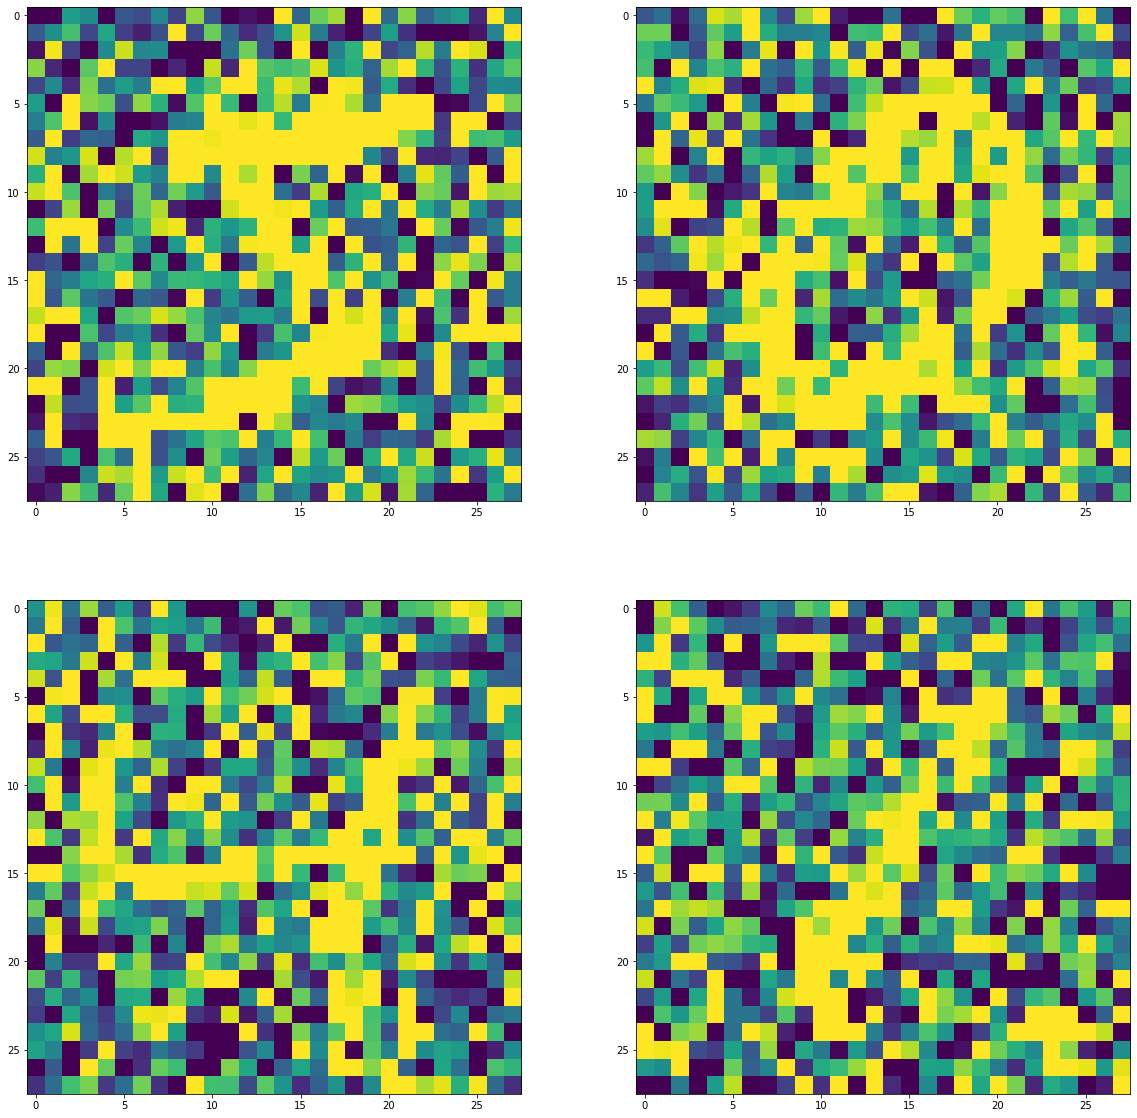

In [13]:
fig=plt.figure(figsize=(20,20))
for i in range(4):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(x_train[i])
  plt.imshow(x_train_noisy[i])
plt.show()

EXO 11